1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2022-11-16 16:06:53--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2022-11-16 16:06:53--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc60654015e078fee66c0138a9d5.dl.dropboxusercontent.com/cd/0/inline/Bw1Xb1Zrlsnzvs4UAUVeXcfVuUrBeM0CtAI3RR0Gfctsk9bQGWuGDATxUOsxuKL7DU3TH9O6gt5HDsXEuRaK6v1e2WwrzOL7HgNA73m3Upr5JxpnZmXXUzYy06SyVl2LTakecOUJZWgr9-bAam6JJrYmllBjK6TOX-CXnFpK27xsbA/file# [following]
--2022-11-16 16:06:54--  https://uc60654015e078fee66c0138a9d5.dl.dropboxusercontent.com/cd/0/inline/Bw1Xb1Zrlsnzvs4UAUVeXcfVuUrBeM0CtAI3RR0Gfctsk9bQGWuGDATxUOsxuKL7DU3TH9O6gt5HDsXEuRaK6v1e2WwrzOL7H

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [1]:
import pandas as pd
file_name = 'data/data_000637.txt'
N = 20000
TDC_dataframe = pd.read_csv(file_name,nrows=20000)
TDC_dataframe

,FHEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29
19996,1,0,63,3869200366,2517,6
19997,1,0,32,3869200366,2519,5
19998,1,0,17,3869200366,2522,21


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [2]:
"""
maxBX_COUNTER = data['BX_COUNTER'][0]
for column in data['BX_COUNTER']:
    if column != 0:
        if column > maxBX_COUNTER:
            maxBX_COUNTER = column
        else:
            maxBX_COUNTER = maxBX_COUNTER
    else:
          break
print(maxBX_COUNTER)
"""
maxBX_COUNTER = TDC_dataframe['BX_COUNTER'].max()
print("Estimation of BX in a ORBIT(x):" ,maxBX_COUNTER)

Estimation of BX in a ORBIT(x): 3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [5]:
from datetime import datetime as dt
orbitCounter = TDC_dataframe[0:len(TDC_dataframe)]['ORBIT_CNT']
bxCounter = TDC_dataframe[0:len(TDC_dataframe)]['BX_COUNTER']
TDCmeasurements = TDC_dataframe[0:len(TDC_dataframe)]['TDC_MEAS']
dateTimeCounter = []
for i in range(0,len(orbitCounter)):
    nanoseconds = ((orbitCounter[i] * (maxBX_COUNTER + 1) * 25) + (bxCounter[i] * 25) + (TDCmeasurements[i] * (25/30)))
    #timestamp = pd.Timestamp(nanoseconds, unit='ns')
    #datetime = dt.fromtimestamp(timestamp)
    dateTimeCounter.append(nanoseconds)

TDC_dataframe['ABSLT_TIME'] = dateTimeCounter
TDC_dataframe['DURATION'] = pd.to_timedelta(TDC_dataframe['ABSLT_TIME'])
TDC_dataframe['ABSLT_TIME'] = pd.to_datetime(TDC_dataframe['ABSLT_TIME'])

#TDC_dataframe['ABSLT_TIME'] = TDC_dataframe['ABSLT_TIME'].astype('datetime64[ns]')
print("After converting the ['ABSLT_TIME'] column to time series we have a DataFrame:\n")
TDC_dataframe

After converting the ['ABSLT_TIME'] column to time series we have a DataFrame:



,FHEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSLT_TIME,DURATION
0,1,0,123,3869200167,2374,26,1970-01-04 23:45:45.734939071,3 days 23:45:45.734939071
1,1,0,124,3869200167,2374,27,1970-01-04 23:45:45.734939072,3 days 23:45:45.734939072
2,1,0,63,3869200167,2553,28,1970-01-04 23:45:45.734943548,3 days 23:45:45.734943548
3,1,0,64,3869200167,2558,19,1970-01-04 23:45:45.734943665,3 days 23:45:45.734943665
4,1,0,64,3869200167,2760,25,1970-01-04 23:45:45.734948720,3 days 23:45:45.734948720
...,...,...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29,1970-01-04 23:45:45.752673449,3 days 23:45:45.752673449
19996,1,0,63,3869200366,2517,6,1970-01-04 23:45:45.752673530,3 days 23:45:45.752673530
19997,1,0,32,3869200366,2519,5,1970-01-04 23:45:45.752673579,3 days 23:45:45.752673579
19998,1,0,17,3869200366,2522,21,1970-01-04 23:45:45.752673667,3 days 23:45:45.752673667


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [6]:
print("After adding the duration of data retrievement column:\n")
print(TDC_dataframe)
print(TDC_dataframe['DURATION'].max())
print(TDC_dataframe['DURATION'].min())
print("Duration difference between start and finish of the signal retrievement:",TDC_dataframe['DURATION'].max()-TDC_dataframe['DURATION'].min())
duration=TDC_dataframe['ABSLT_TIME'].max()-TDC_dataframe['ABSLT_TIME'].min()
print(duration)

After adding the duration of data retrievement column:

       FHEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0          1     0          123  3869200167        2374        26   
1          1     0          124  3869200167        2374        27   
2          1     0           63  3869200167        2553        28   
3          1     0           64  3869200167        2558        19   
4          1     0           64  3869200167        2760        25   
...      ...   ...          ...         ...         ...       ...   
19995      1     0           27  3869200366        2513        29   
19996      1     0           63  3869200366        2517         6   
19997      1     0           32  3869200366        2519         5   
19998      1     0           17  3869200366        2522        21   
19999      1     0           64  3869200366        2522         0   

                         ABSLT_TIME                  DURATION  
0     1970-01-04 23:45:45.734939071 3 days 23:45:45

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [7]:
groupby = (TDC_dataframe.groupby(['TDC_CHANNEL']).sum()).sort_values(by=['FHEAD'],ascending=False)
print(groupby[:3])

             FHEAD  FPGA      ORBIT_CNT  BX_COUNTER  TDC_MEAS
TDC_CHANNEL                                                  
139           1693   522  6550556050500     2991203         0
64             996    21  3853723466506     1834885     14512
63             969     8  3749255057021     1753201     14389


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [8]:
nonEmptyOrbitCount = len(TDC_dataframe.groupby(['ORBIT_CNT']).count())
print("Nonempty orbit count: ",nonEmptyOrbitCount)

Nonempty orbit count:  200


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [13]:
count = len(TDC_dataframe[TDC_dataframe['TDC_CHANNEL']==139].groupby('ORBIT_CNT').count())
print("Number of unique orbits with at least one measurement from TDC channel 139:",str(count),"\n")


Number of unique orbits with at least one measurement from TDC channel 139: 200 



8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [14]:
serFPGA0 = pd.Series(TDC_dataframe[TDC_dataframe['FPGA'] == 0]['TDC_CHANNEL'].value_counts())
serFPGA1 = pd.Series(TDC_dataframe[TDC_dataframe['FPGA'] == 1]['TDC_CHANNEL'].value_counts())
#FPGA1 = pd.Series(TDC_dataframe[TDC_dataframe['FPGA'] == 1]['TDC_CHANNEL'].value_counts(), index=TDC_dataframe['TDC_CHANNEL'])
print(serFPGA0)
print(serFPGA1)


139    1171
64      975
63      961
61      726
62      711
       ... 
107       6
106       6
98        5
101       3
67        2
Name: TDC_CHANNEL, Length: 118, dtype: int64
139    522
2      479
1      435
4      393
3      362
      ... 
78       1
86       1
93       1
76       1
91       1
Name: TDC_CHANNEL, Length: 125, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

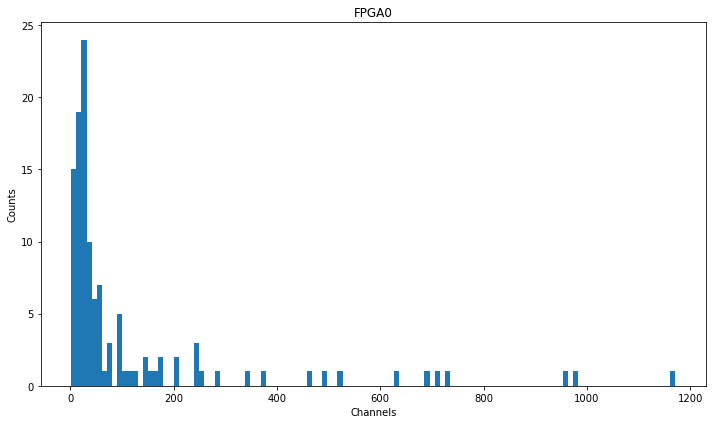

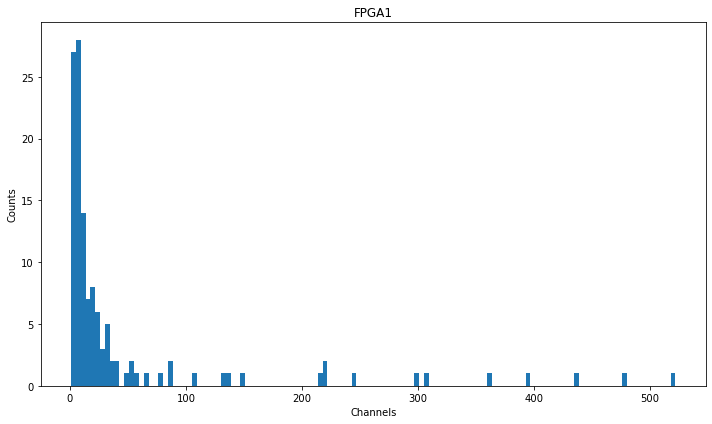

In [15]:
import matplotlib.pyplot as plt
"""
serFPGA0DF = TDC_dataframe[TDC_dataframe['FPGA']== 0].groupby('TDC_CHANNEL').size()
serFPGA1DF = TDC_dataframe[TDC_dataframe['FPGA']== 1].groupby('TDC_CHANNEL').size()
serFPGA0DFChannels = serFPGA0DF.index.values
serFPGA1DFChannels = serFPGA1DF.index.values
serFPGA0DFChannelsCounts = serFPGA0DF.values
serFPGA1DFChannelsCounts = serFPGA1DF.values
"""
fig = plt.figure(figsize=(10, 6))
bins = len(serFPGA0.index)
h, bins, _ = plt.hist(serFPGA0.values, bins=bins) # create and plot the histogram
# get the axes from the figure and pick the first (and only) element (beacuse there is only one axes)
ax = fig.axes[0]
ax.set_title('FPGA0')
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
fig.tight_layout()

fig = plt.figure(figsize=(10, 6))
bins = len(serFPGA1.index)
h, bins, _ = plt.hist(serFPGA1, bins=bins) # create and plot the histogram
# get the axes from the figure and pick the first (and only) element (beacuse there is only one axes)
ax = fig.axes[0]
ax.set_title('FPGA1')
ax.set_xlabel('Channels')
ax.set_ylabel('Counts')
fig.tight_layout()